In [1]:
! pip install openmeteo-requests
! pip install requests-cache retry-requests numpy pandas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

In [2]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

cities = [
    {"latitude": 46.00, "longitude": 8.96, "name": "Lugano"},
    {"latitude": 32.00, "longitude": -96.00, "name": "Dallas"},
    {"latitude": 3.88, "longitude": -77.03, "name": "Buenaventura"}
    # Add more cities here 
]
start_date = "1940-01-01"
end_date = "2024-06-25"
variables = ["temperature_2m", "precipitation"]

data = []
url = "https://customer-archive-api.open-meteo.com/v1/archive"

for city in cities:
    params = {
        "latitude": city["latitude"],
        "longitude": city["longitude"],
        "start_date": start_date,
        "end_date": end_date,
        "hourly": ",".join(variables),
        "apikey": "5ftjs2VK6XVIpyYM"
    
    }
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    hourly = response.Hourly()
    temperatures = hourly.Variables(0).ValuesAsNumpy()
    precipitations = hourly.Variables(1).ValuesAsNumpy()

    hourly_data = {
        "date": pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        ),
        "temperature_2m": temperatures,
        "precipitation": precipitations,
        "city": city["name"]
    }
    data.append(pd.DataFrame(hourly_data))

all_data = pd.concat(data)

In [3]:
Lugano_hourly_dataframe = all_data[all_data["city"] == ('Lugano') ]

Dallas_hourly_dataframe = all_data[all_data["city"] == ('Dallas') ]

Buenaventura_hourly_dataframe = all_data[all_data["city"] == ('Buenaventura') ]



In [4]:
Lugano_hourly_dataframe = Lugano_hourly_dataframe.drop("city",axis=1)
Dallas_hourly_dataframe = Dallas_hourly_dataframe.drop("city",axis=1)
Buenaventura_hourly_dataframe = Buenaventura_hourly_dataframe.drop("city",axis=1)

In [5]:
Lugano_hourly_dataframe["date"] = pd.to_datetime(Lugano_hourly_dataframe["date"])
Lugano_hourly_dataframe.set_index("date", inplace=True)

Buenaventura_hourly_dataframe["date"] = pd.to_datetime(Buenaventura_hourly_dataframe["date"])
Buenaventura_hourly_dataframe.set_index("date", inplace=True)

Dallas_hourly_dataframe["date"] = pd.to_datetime(Dallas_hourly_dataframe["date"])
Dallas_hourly_dataframe.set_index("date", inplace=True)


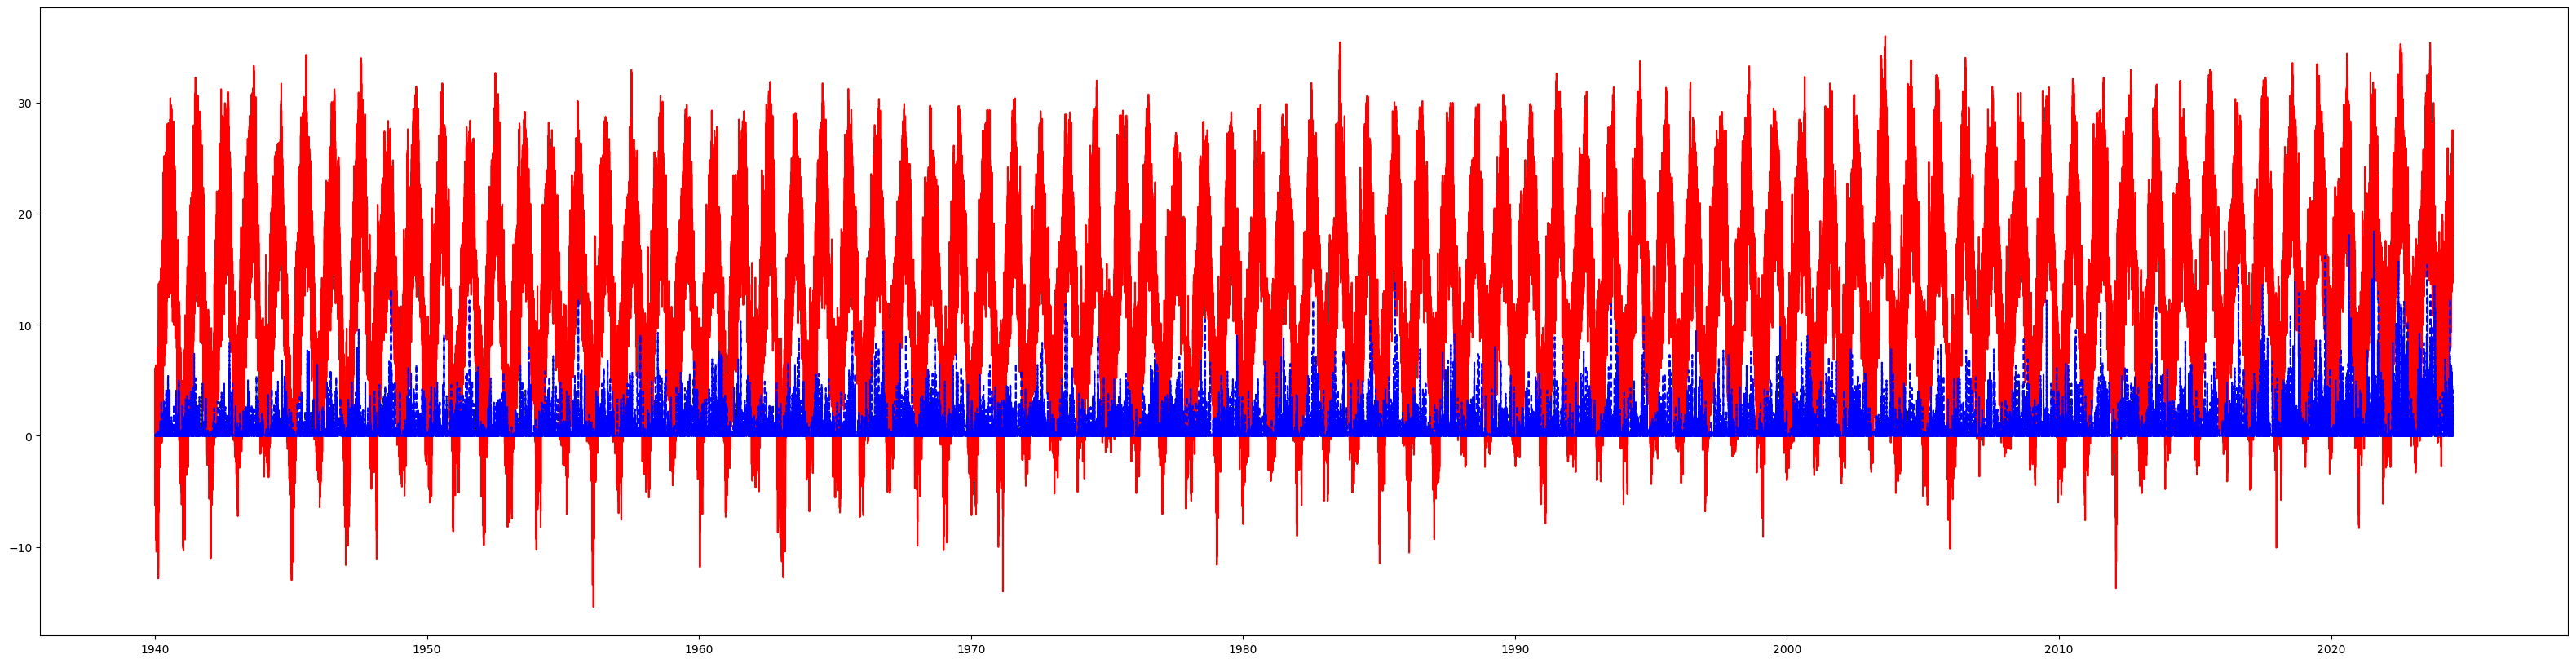

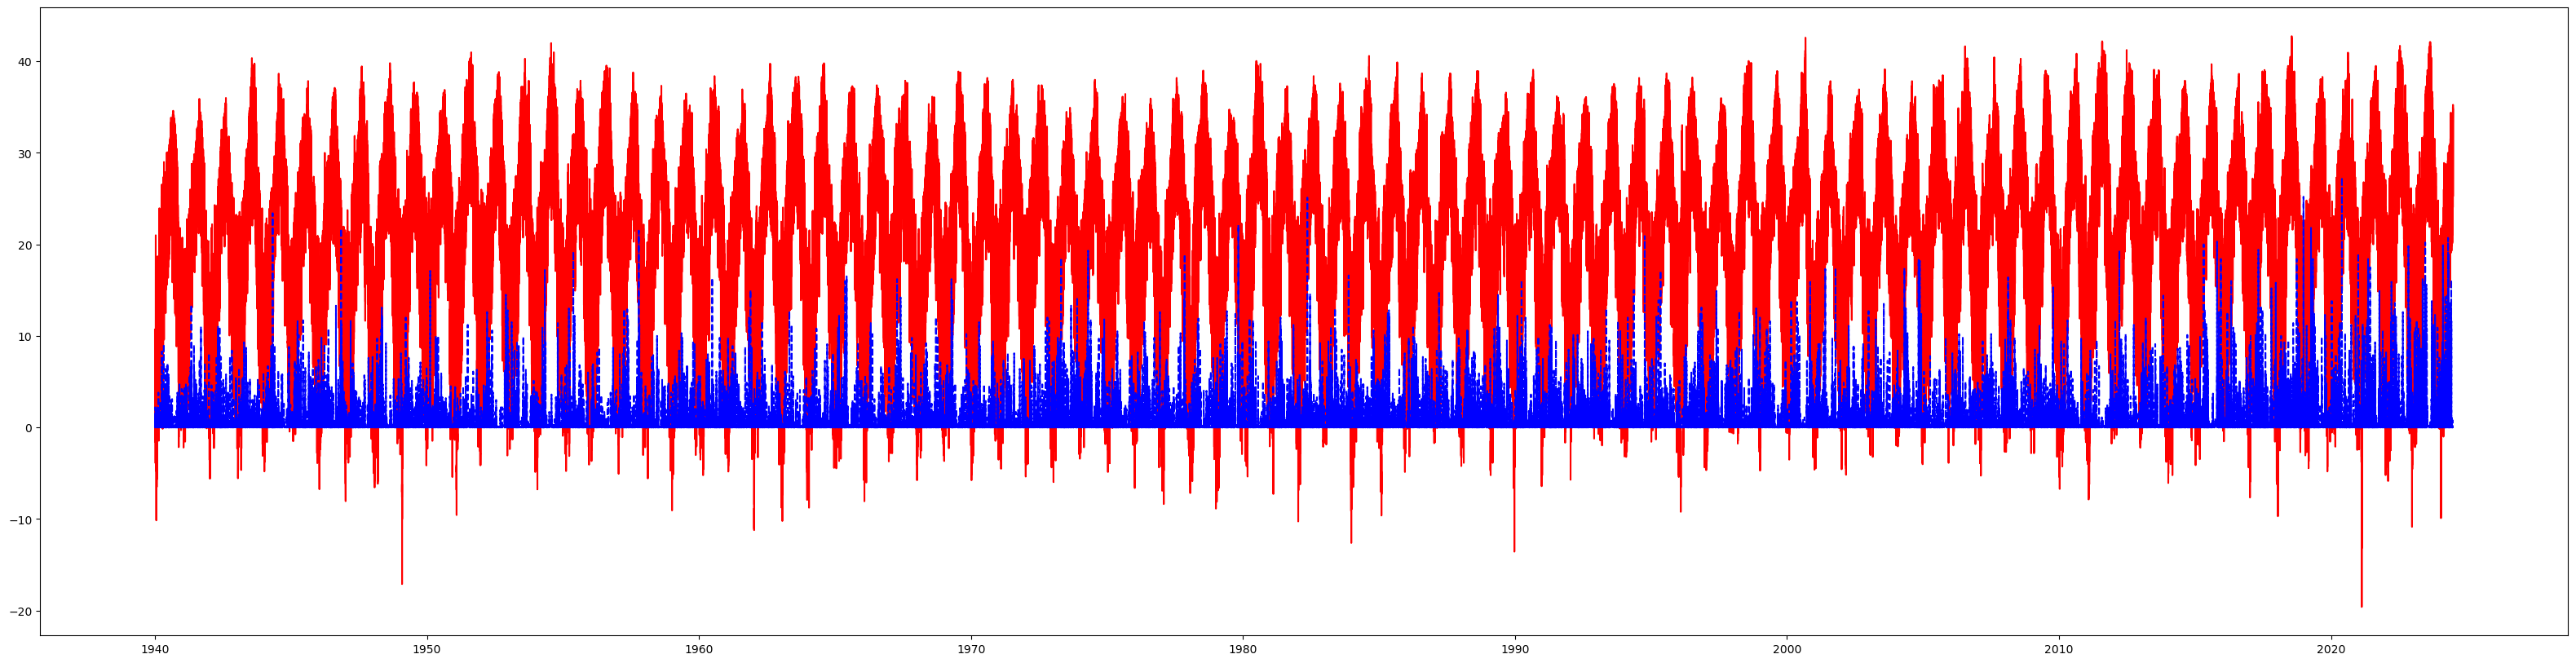

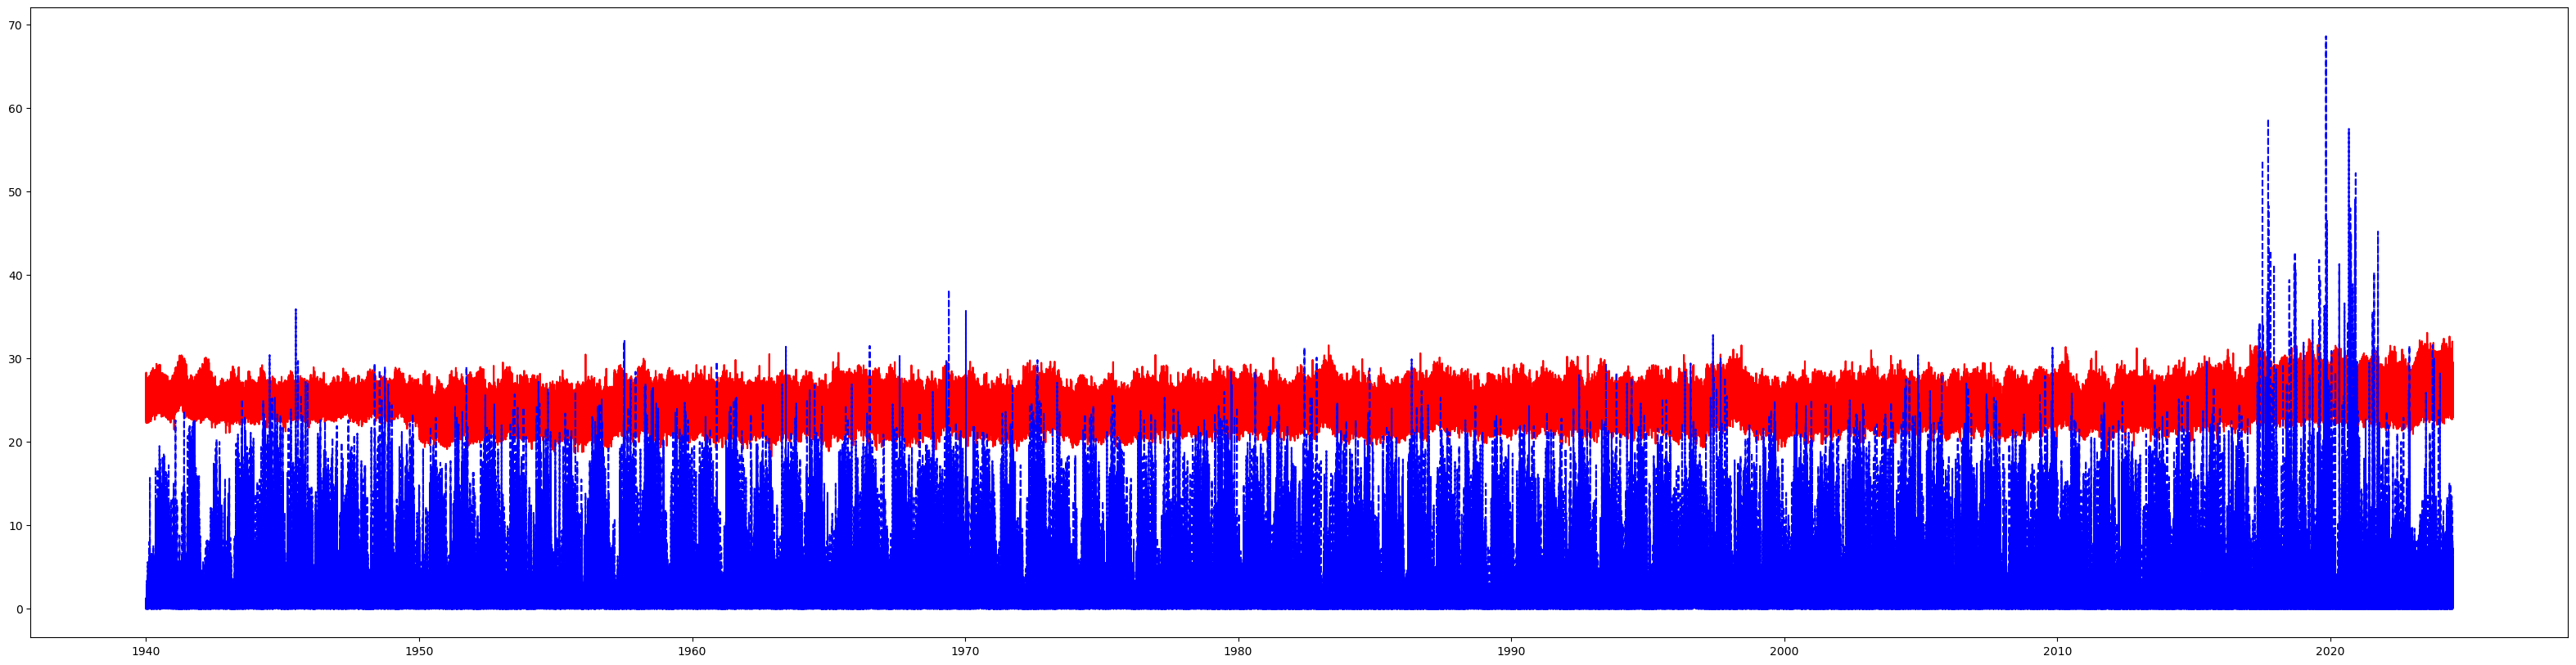

In [6]:
plt.figure(figsize=(40, 10))
plt.plot(Lugano_hourly_dataframe.index, Lugano_hourly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Lugano_hourly_dataframe.index, Lugano_hourly_dataframe["precipitation"], "b--", label="precipitation")

plt.figure(figsize=(40, 10))
plt.plot(Dallas_hourly_dataframe.index, Dallas_hourly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Dallas_hourly_dataframe.index, Dallas_hourly_dataframe["precipitation"], "b--", label="precipitation")

plt.figure(figsize=(40, 10))
plt.plot(Buenaventura_hourly_dataframe.index, Buenaventura_hourly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Buenaventura_hourly_dataframe.index, Buenaventura_hourly_dataframe["precipitation"], "b--", label="precipitation")




In [7]:
Lugano_monthly_dataframe = Lugano_hourly_dataframe.resample("M").mean()
Dallas_monthly_dataframe = Dallas_hourly_dataframe.resample("M").mean()
Buenaventura_monthly_dataframe = Buenaventura_hourly_dataframe.resample("M").mean()

Lugano_monthly_dataframe

/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/1675896036.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Lugano_monthly_dataframe = Lugano_hourly_dataframe.resample("M").mean()
/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/1675896036.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Dallas_monthly_dataframe = Dallas_hourly_dataframe.resample("M").mean()
/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/1675896036.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Buenaventura_monthly_dataframe = Buenaventura_hourly_dataframe.resample("M").mean()


,temperature_2m,precipitation
date,,
1940-01-31 00:00:00+00:00,-1.850384,0.013704
1940-02-29 00:00:00+00:00,1.340842,0.011351
1940-03-31 00:00:00+00:00,6.203379,0.081586
1940-04-30 00:00:00+00:00,11.460861,0.122222
1940-05-31 00:00:00+00:00,15.645987,0.206048
...,...,...
2024-02-29 00:00:00+00:00,8.497727,0.312500
2024-03-31 00:00:00+00:00,9.237638,0.459543
2024-04-30 00:00:00+00:00,12.316264,0.168889


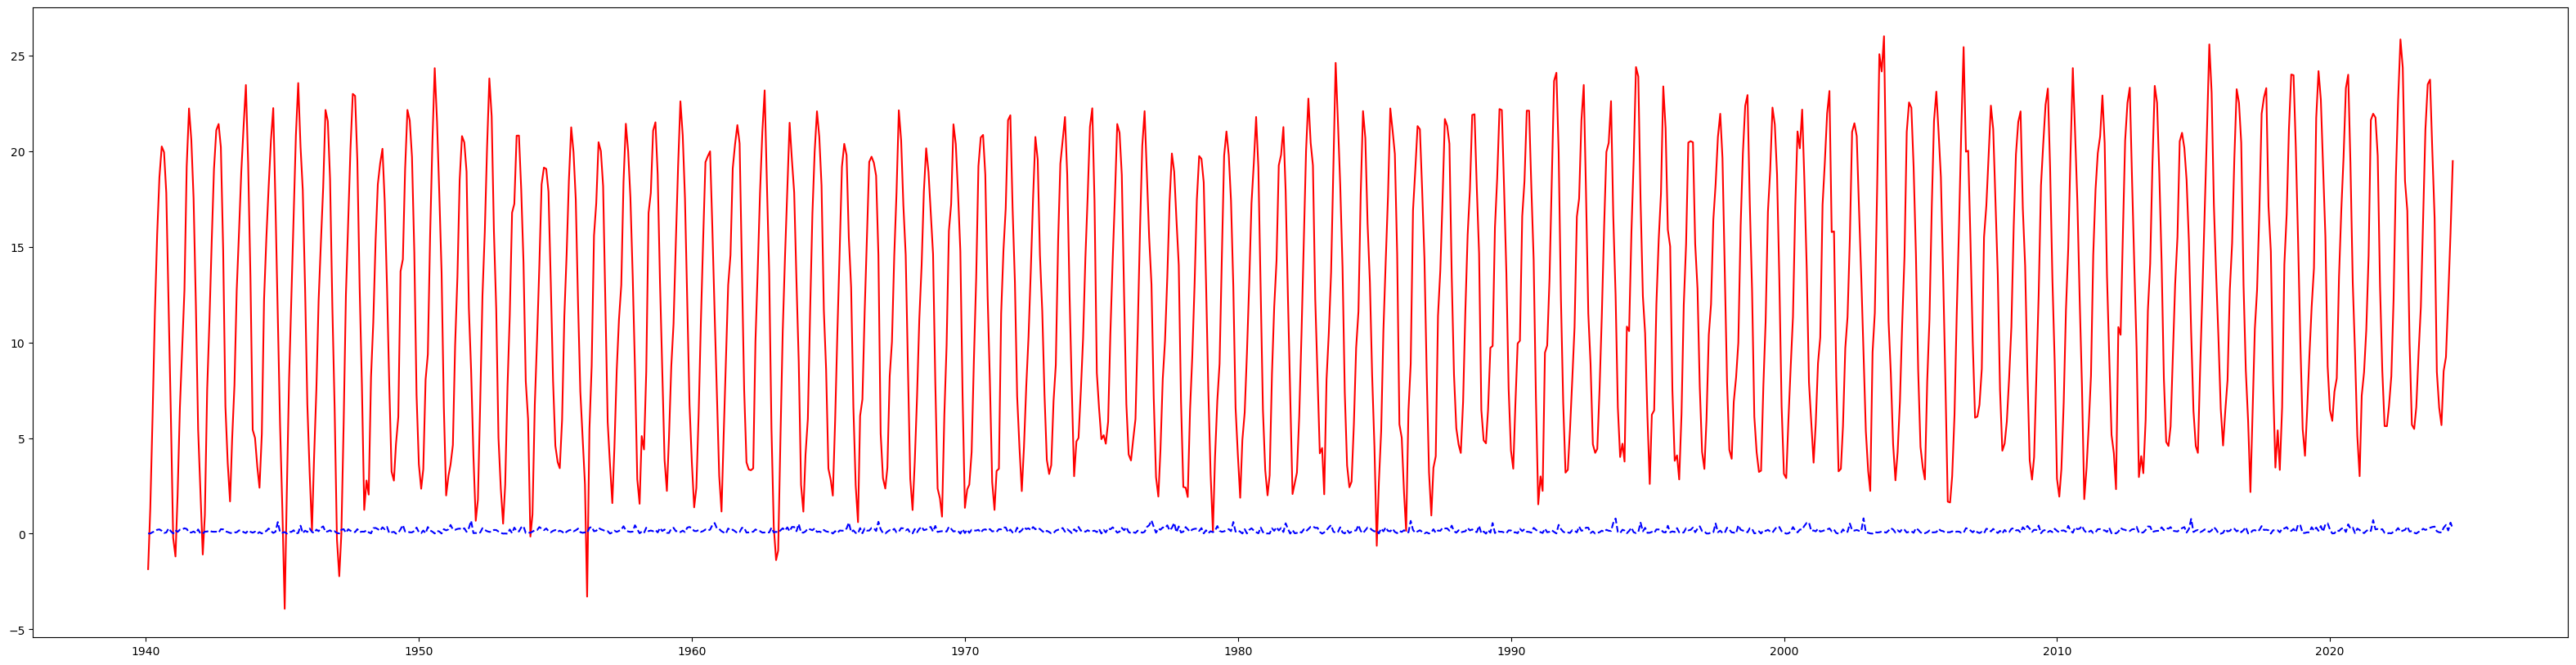

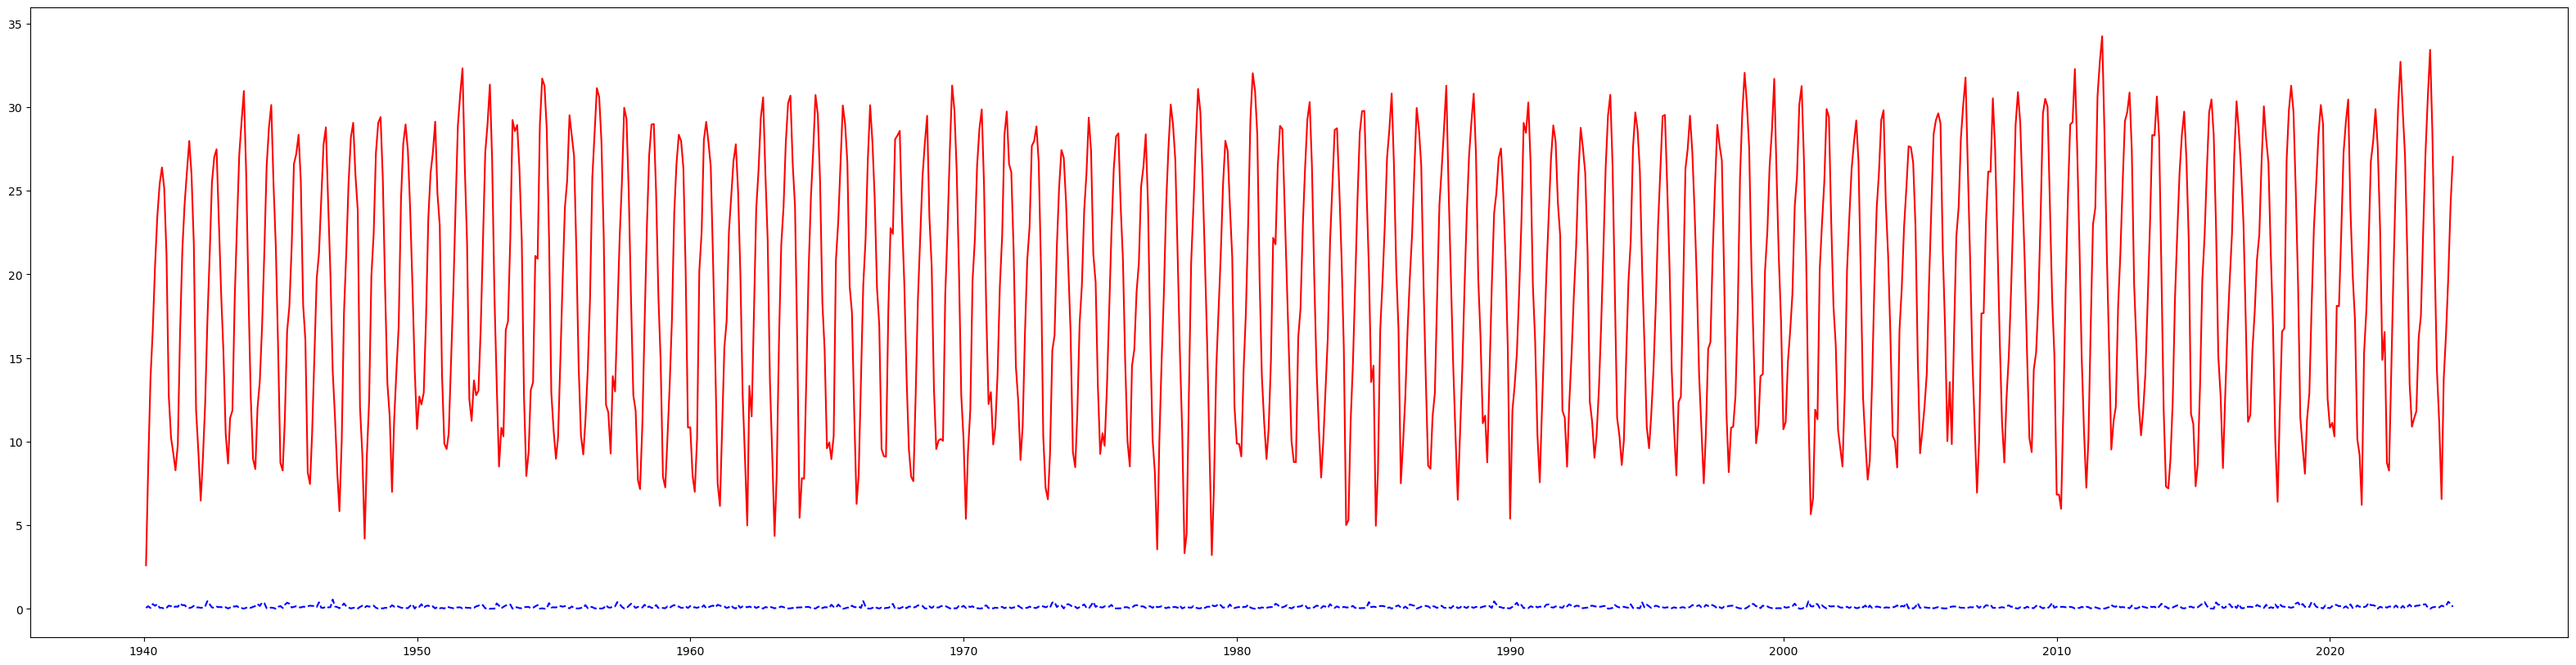

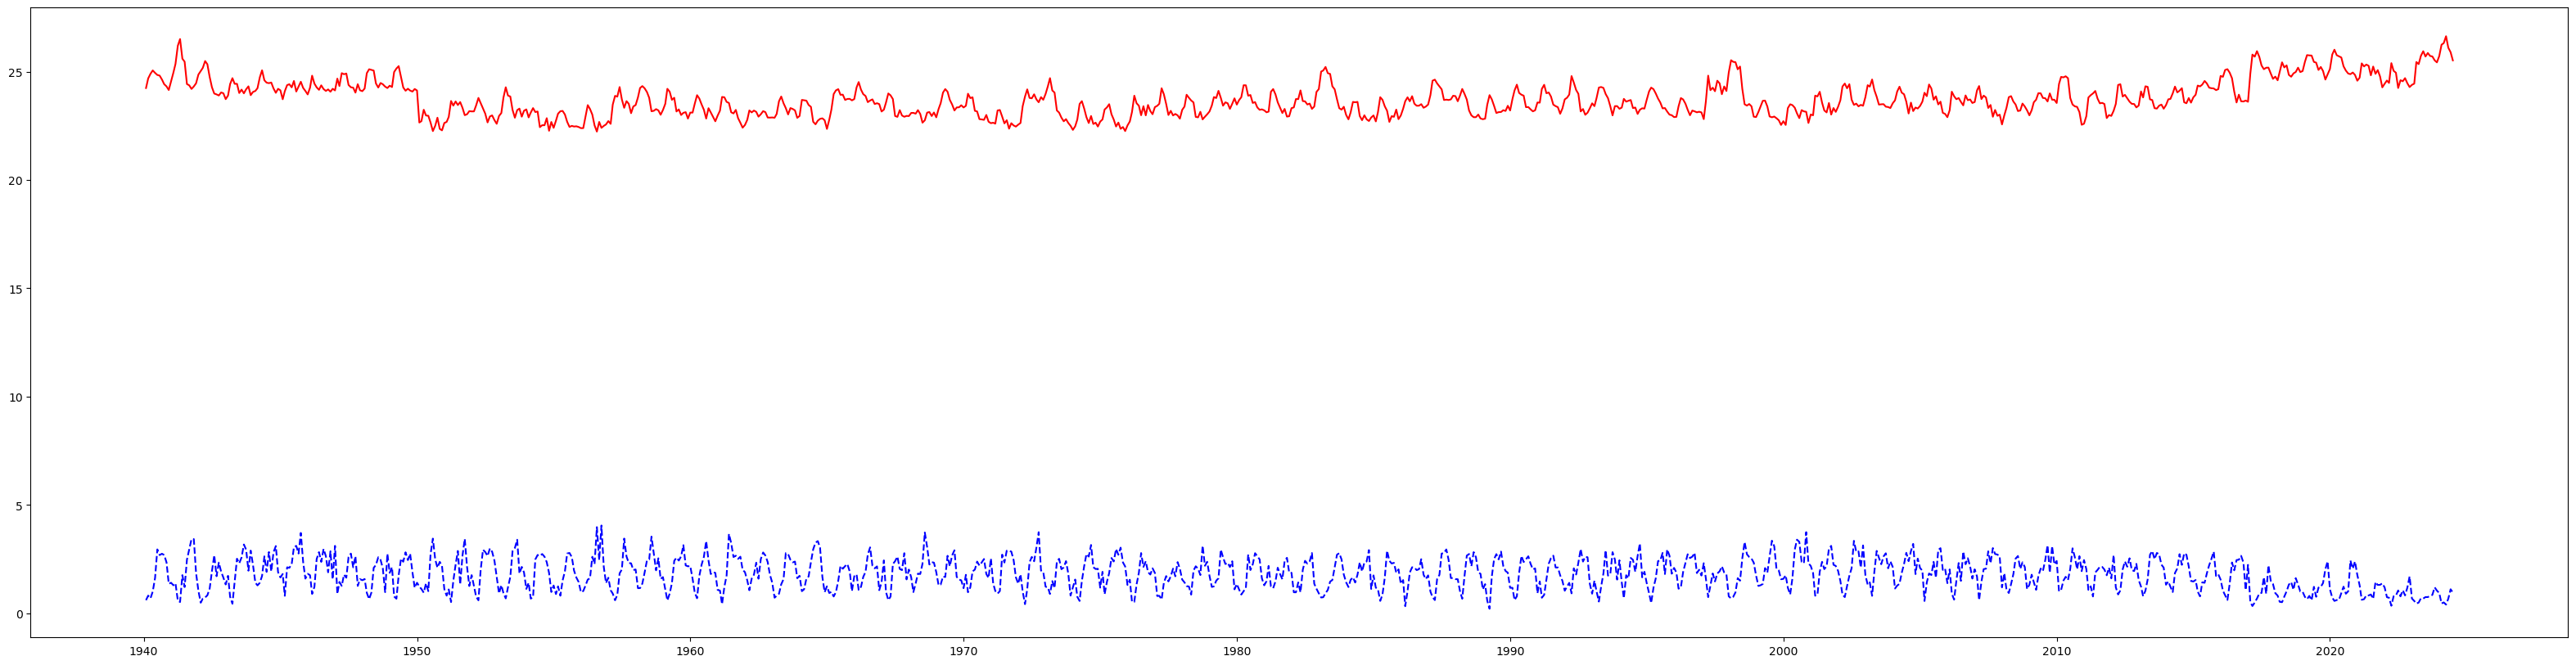

In [8]:
plt.figure(figsize=(40, 10))
plt.plot(Lugano_monthly_dataframe.index, Lugano_monthly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Lugano_monthly_dataframe.index, Lugano_monthly_dataframe["precipitation"], "b--", label="precipitation")

plt.figure(figsize=(40, 10))
plt.plot(Dallas_monthly_dataframe.index, Dallas_monthly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Dallas_monthly_dataframe.index, Dallas_monthly_dataframe["precipitation"], "b--", label="precipitation")

plt.figure(figsize=(40, 10))
plt.plot(Buenaventura_monthly_dataframe.index, Buenaventura_monthly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Buenaventura_monthly_dataframe.index, Buenaventura_monthly_dataframe["precipitation"], "b--", label="precipitation")




In [9]:
Lugano_yearly_dataframe = Lugano_hourly_dataframe.resample("Y").mean()
Dallas_yearly_dataframe = Dallas_hourly_dataframe.resample("Y").mean()
Buenaventura_yearly_dataframe = Buenaventura_hourly_dataframe.resample("Y").mean()


/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/1982165236.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Lugano_yearly_dataframe = Lugano_hourly_dataframe.resample("Y").mean()
/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/1982165236.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Dallas_yearly_dataframe = Dallas_hourly_dataframe.resample("Y").mean()
/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/1982165236.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Buenaventura_yearly_dataframe = Buenaventura_hourly_dataframe.resample("Y").mean()


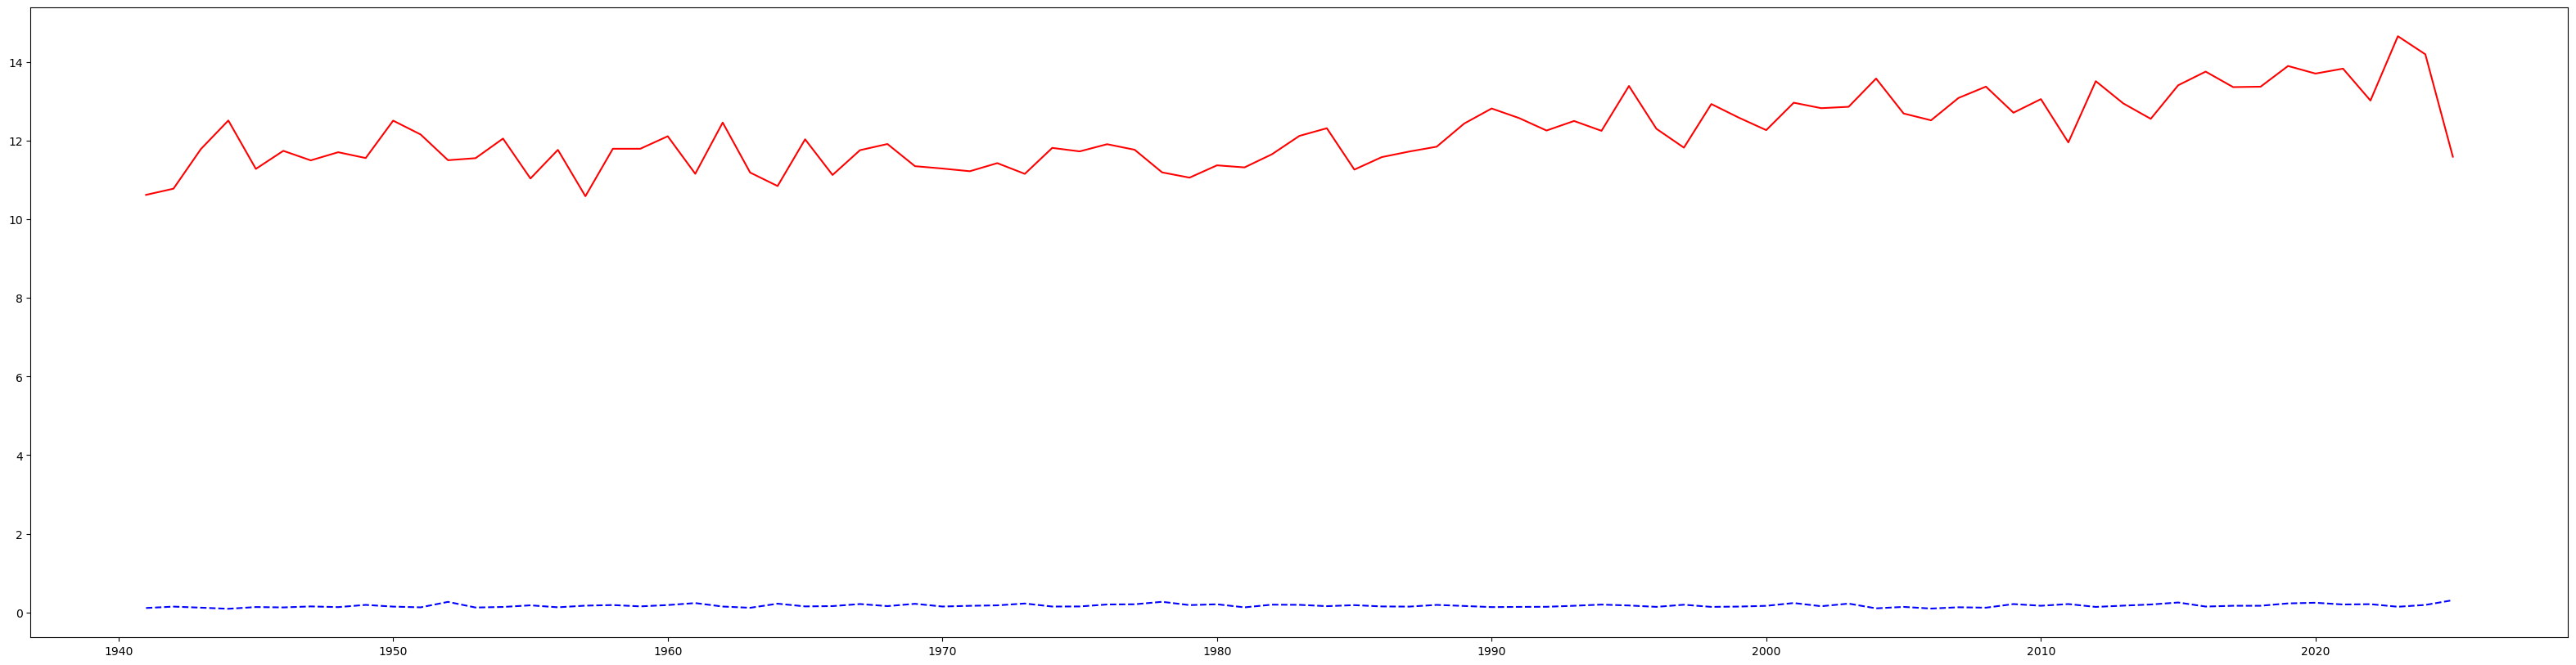

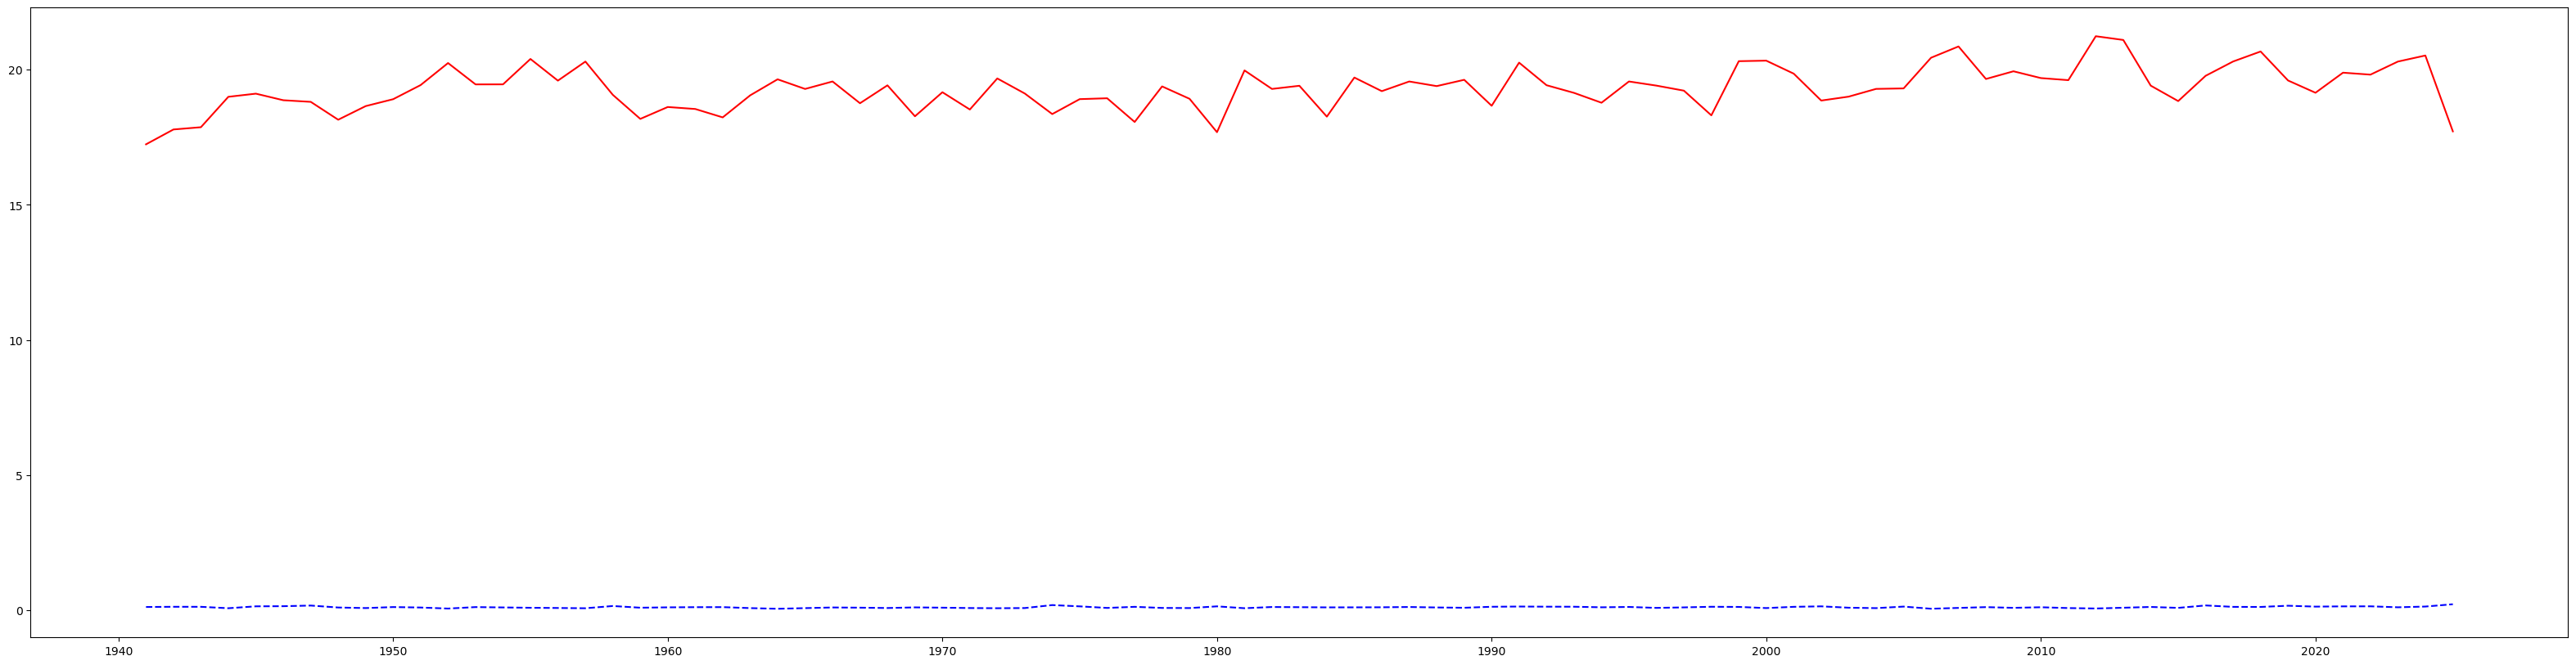

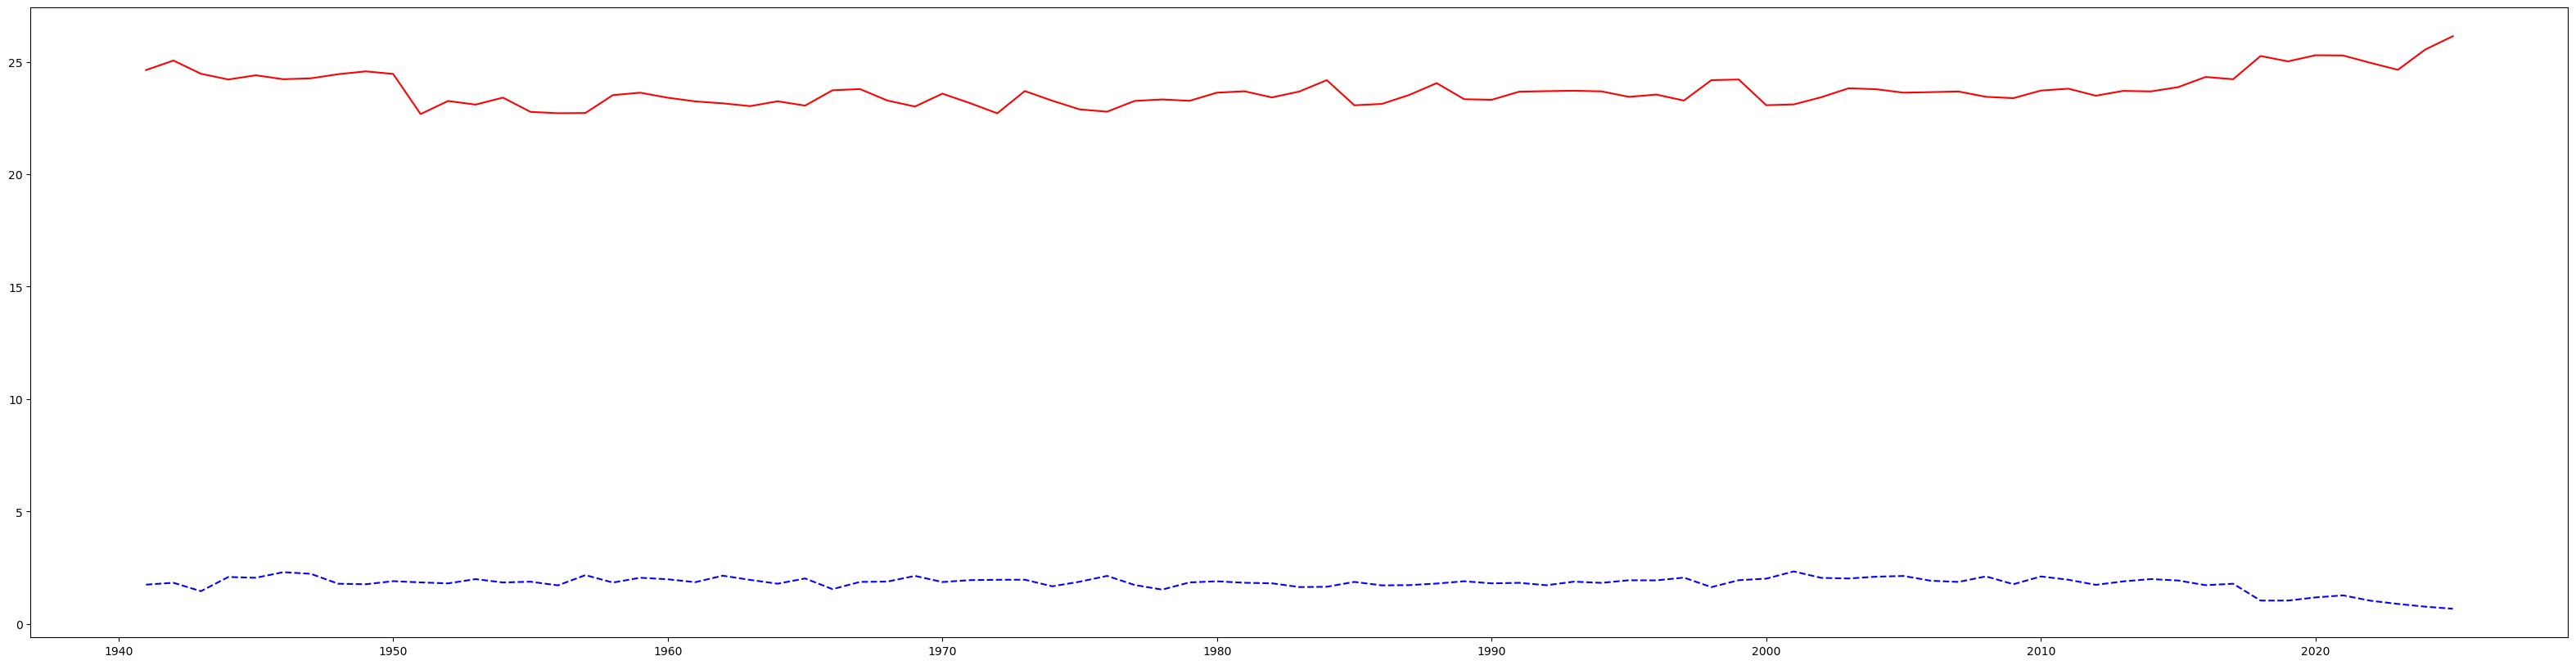

In [10]:
plt.figure(figsize=(40, 10))
plt.plot(Lugano_yearly_dataframe.index, Lugano_yearly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Lugano_yearly_dataframe.index, Lugano_yearly_dataframe["precipitation"], "b--", label="precipitation")

plt.figure(figsize=(40, 10))
plt.plot(Dallas_yearly_dataframe.index, Dallas_yearly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Dallas_yearly_dataframe.index, Dallas_yearly_dataframe["precipitation"], "b--", label="precipitation")

plt.figure(figsize=(40, 10))
plt.plot(Buenaventura_yearly_dataframe.index, Buenaventura_yearly_dataframe["temperature_2m"], "r-", label="temperature")
plt.plot(Buenaventura_yearly_dataframe.index, Buenaventura_yearly_dataframe["precipitation"], "b--", label="precipitation")




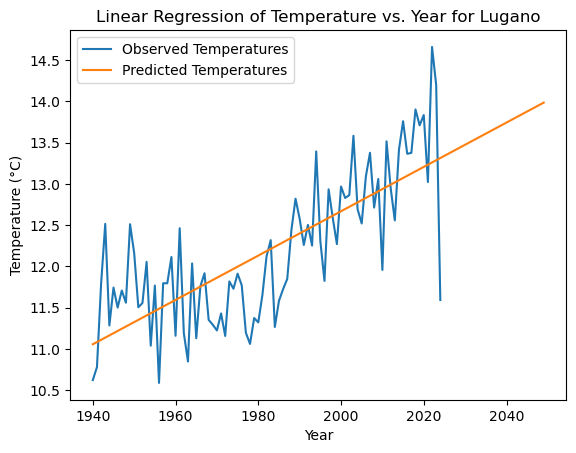

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Lugano_daily_dataframe = pd.DataFrame()
Lugano_daily_dataframe = Lugano_hourly_dataframe.resample("D").mean()
lugano_yearly = Lugano_daily_dataframe.resample("YE").mean()

# Assuming Lugano_yearly_dataframe is already defined
# Extract the year from the date index
lugano_yearly['year'] = lugano_yearly.index.year

# Linear regression for temperature vs year
X = lugano_yearly['year'].values.reshape(-1, 1)
y = lugano_yearly['temperature_2m'].values

# Fit the model
model = LinearRegression().fit(X, y)

# Predict temperatures until 2070
future_years = np.arange(1940, 2050).reshape(-1, 1)
future_temperatures = model.predict(future_years)

# Plot the results
plt.plot(lugano_yearly['year'], y, label='Observed Temperatures')
plt.plot(future_years, future_temperatures, label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Linear Regression of Temperature vs. Year for Lugano')
plt.legend()
plt.show()

In [12]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://customer-climate-api.open-meteo.com/v1/climate"
params = {
	"latitude": 46.003677,
	"longitude": 8.951052,
	"start_date": "1950-01-01",
	"end_date": "2050-12-31",
	"models": ["CMCC_CM2_VHR4", "FGOALS_f3_H", "HiRAM_SIT_HR", "MRI_AGCM3_2_S", "EC_Earth3P_HR", "MPI_ESM1_2_XR", "NICAM16_8S"],
	"daily": "temperature_2m_mean",
    "apikey": "5ftjs2VK6XVIpyYM"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean

daily_dataframe_lugano = pd.DataFrame(data = daily_data)
print(daily_dataframe_lugano)

Coordinates 45.90000915527344°N 8.900009155273438°E
Elevation 286.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                           date  temperature_2m_mean
0     1950-01-01 00:00:00+00:00            -2.866088
1     1950-01-02 00:00:00+00:00            -0.463145
2     1950-01-03 00:00:00+00:00             0.439797
3     1950-01-04 00:00:00+00:00             2.042739
4     1950-01-05 00:00:00+00:00             2.495682
...                         ...                  ...
36885 2050-12-27 00:00:00+00:00             2.707109
36886 2050-12-28 00:00:00+00:00             2.883643
36887 2050-12-29 00:00:00+00:00             3.610177
36888 2050-12-30 00:00:00+00:00             5.236711
36889 2050-12-31 00:00:00+00:00             9.263245

[36890 rows x 2 columns]


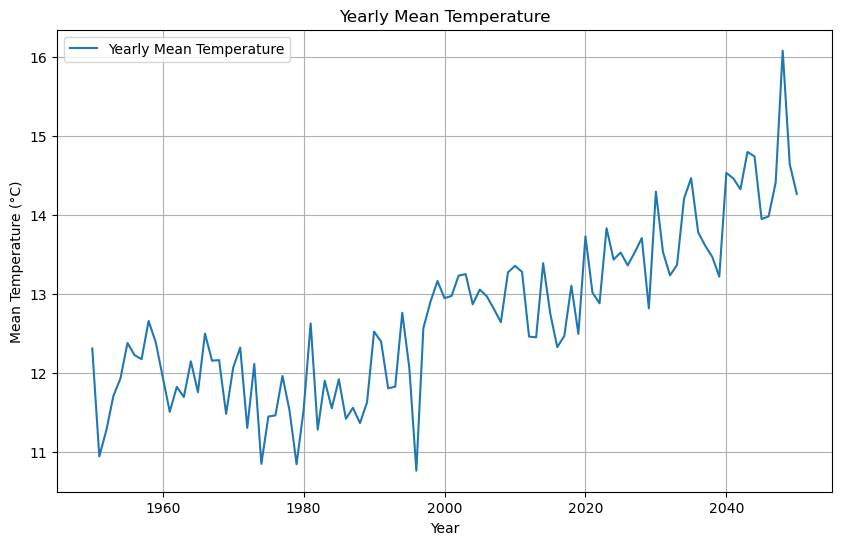

In [15]:
daily_dataframe['date'] = pd.to_datetime(daily_dataframe['date'])

# Extract the year from the 'date' column
daily_dataframe['year'] = daily_dataframe['date'].dt.year

# Group by 'year' and calculate the mean temperature for each year
yearly_mean_temperature = daily_dataframe.groupby('year')['temperature_2m_mean'].mean()

# Plot the yearly mean temperatures
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='Yearly Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('OG Yearly Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/322239993.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  lugano_yearly = Lugano_daily_dataframe.resample("Y").mean()


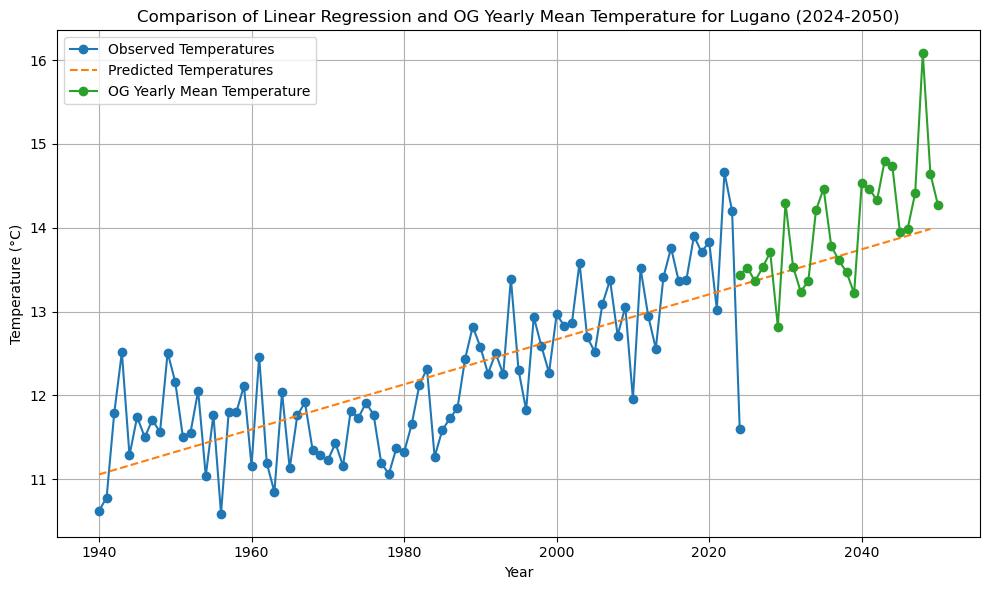

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming Lugano_hourly_dataframe is already defined and contains hourly data
Lugano_daily_dataframe = Lugano_hourly_dataframe.resample("D").mean()
lugano_yearly = Lugano_daily_dataframe.resample("Y").mean()

# Extract the year from the date index
lugano_yearly['year'] = lugano_yearly.index.year

# Linear regression for temperature vs year
X = lugano_yearly['year'].values.reshape(-1, 1)
y = lugano_yearly['temperature_2m'].values

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Predict temperatures until 2050
future_years = np.arange(1940, 2050).reshape(-1, 1)
future_temperatures = model.predict(future_years)

# Plotting the linear regression results
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.plot(lugano_yearly['year'], y, label='Observed Temperatures', marker='o', linestyle='-')
# Plotting observed temperatures as points connected by lines
plt.plot(future_years, future_temperatures, label='Predicted Temperatures', linestyle='--')
# Plotting predicted temperatures as dashed lines

# Extract the year from the 'date' column in daily_dataframe and filter for years 2024 to 2050
daily_dataframe['date'] = pd.to_datetime(daily_dataframe['date'])  # Converting 'date' to datetime format
daily_dataframe['year'] = daily_dataframe['date'].dt.year  # Extracting the year from 'date'
filtered_dataframe = daily_dataframe[(daily_dataframe['year'] >= 2024) & (daily_dataframe['year'] <= 2050)]
# Filtering daily data for years 2024-2050

# Group by 'year' and calculate the mean temperature for each year
yearly_mean_temperature = filtered_dataframe.groupby('year')['temperature_2m_mean'].mean()

# Plotting the yearly mean temperatures from daily_dataframe
plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='OG Yearly Mean Temperature', marker='o', linestyle='-')
# Plotting original yearly mean temperatures as points connected by lines

# Customizing the plot
plt.xlabel('Year')  # Labeling the x-axis
plt.ylabel('Temperature (°C)')  # Labeling the y-axis
plt.title('Comparison of Linear Regression and OG Yearly Mean Temperature for Lugano (2024-2050)')  # Setting the plot title
plt.legend()  # Showing the legend
plt.grid(True)  # Adding grid lines
plt.tight_layout()  # Adjusting the layout for better spacing
plt.show()  # Displaying the plot


Processing data for Lugano:
Coordinates 45.90000915527344°N 8.900009155273438°E
Elevation 286.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Dallas:
Coordinates 32.80000305175781°N -96.79999542236328°E
Elevation 137.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Buenaventura:
Coordinates 3.9000015258789062°N -77.0°E
Elevation 8.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s

DataFrame for Lugano:
                           date  temperature_2m_mean
0     1950-01-01 00:00:00+00:00            -2.866088
1     1950-01-02 00:00:00+00:00            -0.463145
2     1950-01-03 00:00:00+00:00             0.439797
3     1950-01-04 00:00:00+00:00             2.042739
4     1950-01-05 00:00:00+00:00             2.495682
...                         ...                  ...
36885 2050-12-27 00:00:00+00:00             2.707109
36886 2050-12-28 00:00:00+00:00             2.883643
36887 2050-12-29 00:00:00+00:00             

In [35]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Define a list of cities with their coordinates
cities = [
    {"latitude": 46.003677, "longitude": 8.951052, "name": "Lugano"},
    {"latitude": 32.7767, "longitude": -96.7970, "name": "Dallas"},
    {"latitude": 3.8773, "longitude": -77.0306, "name": "Buenaventura"}
    # Add more cities as needed
]

# Define the parameters for the API request
url = "https://customer-climate-api.open-meteo.com/v1/climate"
models = ["CMCC_CM2_VHR4", "FGOALS_f3_H", "HiRAM_SIT_HR", "MRI_AGCM3_2_S", "EC_Earth3P_HR", "MPI_ESM1_2_XR", "NICAM16_8S"]
start_date = "1950-01-01"
end_date = "2050-12-31"
daily_variable = "temperature_2m_mean"
apikey = "5ftjs2VK6XVIpyYM"

# Initialize a dictionary to store dataframes for each city
city_dataframes = {}

# Loop through each city and fetch the weather data
for city in cities:
    params = {
        "latitude": city["latitude"],
        "longitude": city["longitude"],
        "start_date": start_date,
        "end_date": end_date,
        "models": models,
        "daily": daily_variable,
        "apikey": apikey
    }
    
    responses = openmeteo.weather_api(url, params=params)
    
    # Process the response for the current city
    response = responses[0]
    print(f"Processing data for {city['name']}:")
    print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
    print(f"Elevation {response.Elevation()} m asl")
    print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
    print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
    
    # Process daily data
    daily = response.Daily()
    daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
    
    daily_data = {
        "date": pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        )
    }
    daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
    
    # Create a DataFrame for the current city and add it to the dictionary
    city_dataframe = pd.DataFrame(data=daily_data)
    city_dataframes[city["name"]] = city_dataframe

# Extract a single DataFrame for a specific city (e.g., "Lugano")
city_name_to_extract = "Lugano"
extracted_dataframe = city_dataframes[city_name_to_extract]

# Print the extracted DataFrame
print(f"\nDataFrame for {city_name_to_extract}:")
print(extracted_dataframe)



Processing data for Lugano:
Coordinates 45.90000915527344°N 8.900009155273438°E
Elevation 286.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Dallas:
Coordinates 32.80000305175781°N -96.79999542236328°E
Elevation 137.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Buenaventura:
Coordinates 3.9000015258789062°N -77.0°E
Elevation 8.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s

DataFrame for Lugano:
                           date  temperature_2m_mean
0     1950-01-01 00:00:00+00:00            -2.866088
1     1950-01-02 00:00:00+00:00            -0.463145
2     1950-01-03 00:00:00+00:00             0.439797
3     1950-01-04 00:00:00+00:00             2.042739
4     1950-01-05 00:00:00+00:00             2.495682
...                         ...                  ...
36885 2050-12-27 00:00:00+00:00             2.707109
36886 2050-12-28 00:00:00+00:00             2.883643
36887 2050-12-29 00:00:00+00:00             

Processing data for Lugano:
Coordinates 45.90000915527344°N 8.900009155273438°E
Elevation 286.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Dallas:
Coordinates 32.80000305175781°N -96.79999542236328°E
Elevation 137.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Buenaventura:
Coordinates 3.9000015258789062°N -77.0°E
Elevation 8.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/951043112.py:77: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = daily_dataframe.resample("Y").mean()


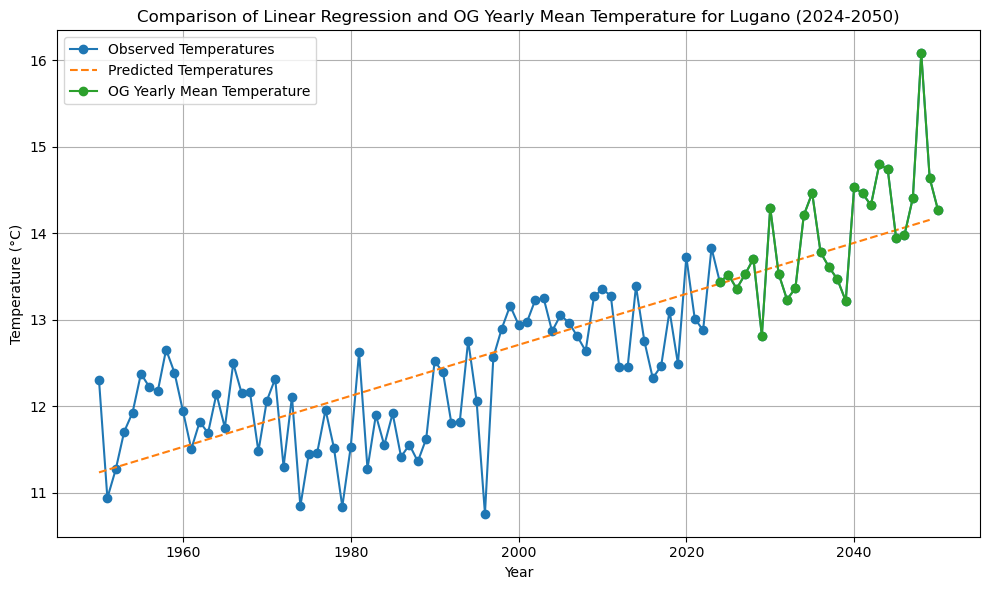

/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/951043112.py:77: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = daily_dataframe.resample("Y").mean()


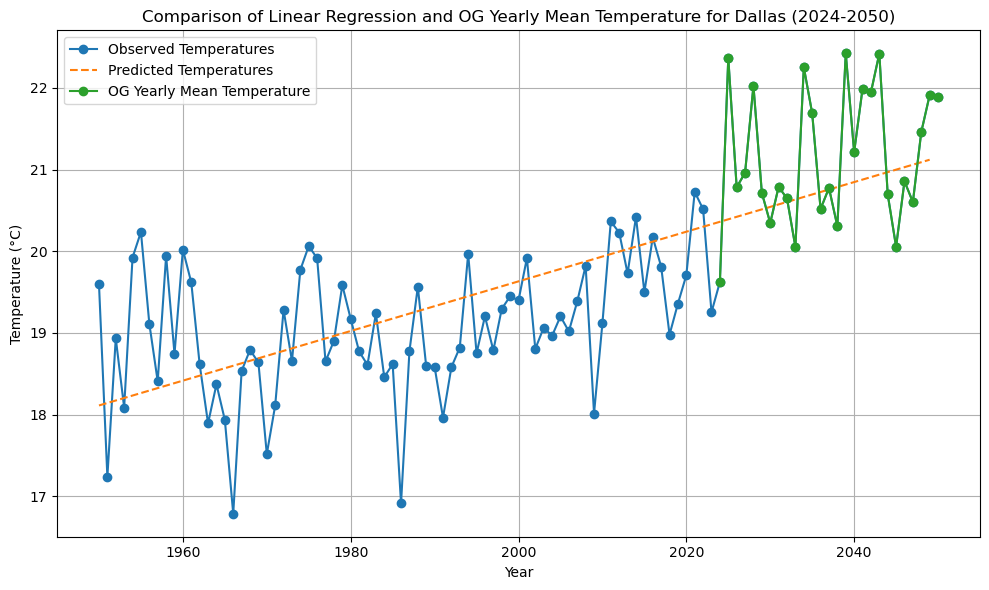

/var/folders/pw/1cm49_4j4bn00208sw3x8m2m0000gn/T/ipykernel_70096/951043112.py:77: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = daily_dataframe.resample("Y").mean()


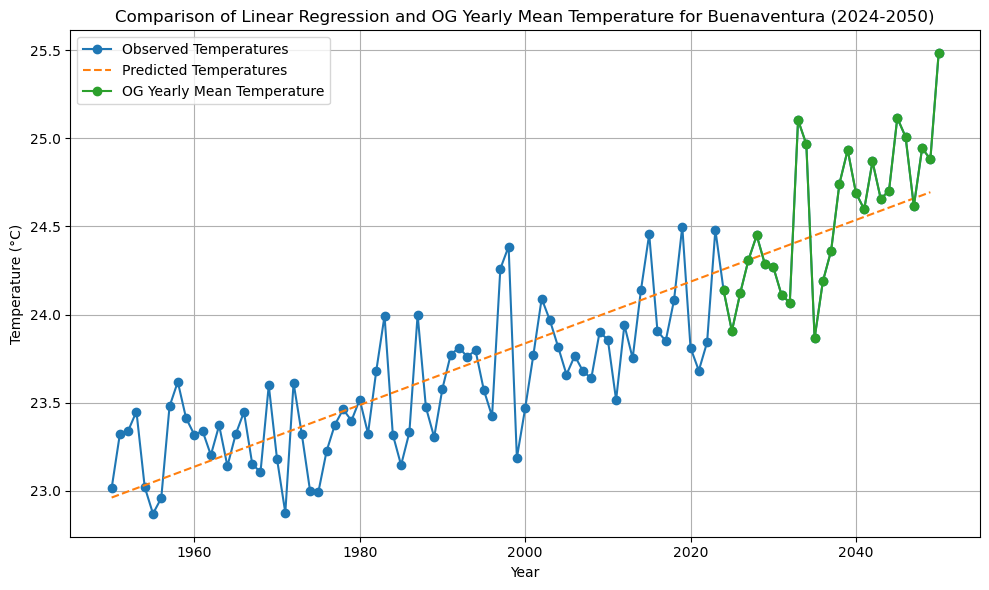

In [36]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Define a list of cities with their coordinates
cities = [
    {"latitude": 46.003677, "longitude": 8.951052, "name": "Lugano"},
    {"latitude": 32.7767, "longitude": -96.7970, "name": "Dallas"},
    {"latitude": 3.8773, "longitude": -77.0306, "name": "Buenaventura"}
    # Add more cities as needed
]

# Define the parameters for the API request
url = "https://customer-climate-api.open-meteo.com/v1/climate"
models = ["CMCC_CM2_VHR4", "FGOALS_f3_H", "HiRAM_SIT_HR", "MRI_AGCM3_2_S", "EC_Earth3P_HR", "MPI_ESM1_2_XR", "NICAM16_8S"]
start_date = "1950-01-01"
end_date = "2050-12-31"
daily_variable = "temperature_2m_mean"
apikey = "5ftjs2VK6XVIpyYM"

# Initialize a dictionary to store dataframes for each city
city_dataframes = {}

# Loop through each city and fetch the weather data
for city in cities:
    params = {
        "latitude": city["latitude"],
        "longitude": city["longitude"],
        "start_date": start_date,
        "end_date": end_date,
        "models": models,
        "daily": daily_variable,
        "apikey": apikey
    }
    
    responses = openmeteo.weather_api(url, params=params)
    
    # Process the response for the current city
    response = responses[0]
    print(f"Processing data for {city['name']}:")
    print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
    print(f"Elevation {response.Elevation()} m asl")
    print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
    print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
    
    # Process daily data
    daily = response.Daily()
    daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
    
    daily_data = {
        "date": pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        )
    }
    daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
    
    # Create a DataFrame for the current city and add it to the dictionary
    city_dataframe = pd.DataFrame(data=daily_data)
    city_dataframes[city["name"]] = city_dataframe

# Plotting the data for each city
for city_name, daily_dataframe in city_dataframes.items():
    # Resample daily data to yearly data
    daily_dataframe.set_index('date', inplace=True)
    yearly_data = daily_dataframe.resample("Y").mean()

    # Extract the year from the date index
    yearly_data['year'] = yearly_data.index.year

    # Linear regression for temperature vs year
    X = yearly_data['year'].values.reshape(-1, 1)
    y = yearly_data['temperature_2m_mean'].values

    # Fit the linear regression model
    model = LinearRegression().fit(X, y)

    # Predict temperatures until 2050
    future_years = np.arange(1950, 2050).reshape(-1, 1)
    future_temperatures = model.predict(future_years)

    # Plotting the linear regression results
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data['year'], y, label='Observed Temperatures', marker='o', linestyle='-')
    plt.plot(future_years, future_temperatures, label='Predicted Temperatures', linestyle='--')

    # Extract the year from the 'date' column in daily_dataframe and filter for years 2024 to 2050
    daily_dataframe['year'] = daily_dataframe.index.year
    filtered_dataframe = daily_dataframe[(daily_dataframe['year'] >= 2024) & (daily_dataframe['year'] <= 2050)]

    # Group by 'year' and calculate the mean temperature for each year
    yearly_mean_temperature = filtered_dataframe.groupby('year')['temperature_2m_mean'].mean()

    # Plotting the yearly mean temperatures from daily_dataframe
    plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='OG Yearly Mean Temperature', marker='o', linestyle='-')

    # Customizing the plot
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Comparison of Linear Regression and OG Yearly Mean Temperature for {city_name} (2024-2050)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
